## Name: Batyrkhan Taldybayev
## Group: IT3-2203
## Date: 01.03.2025

---
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, mean_absolute_error, r2_score

# SVM
from sklearn.svm import SVR

# MLP
from sklearn.neural_network import MLPRegressor

## Preparing dataframe and splitting data for models

In [2]:
data = pd.read_csv("student.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Encoding categorical columns

In [3]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Learning_Disabilities", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Parental_Education_Level", "Distance_from_Home", "Gender"
]

le = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(le.fit_transform)
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [4]:
X = data.drop(columns=["Exam_Score"])
y = data["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## Using SVM

In [5]:
svr = SVR(kernel="rbf", C=100, gamma=0.01, epsilon=0.01)
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)

print("SVM Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_svr):.2f}")

SVM Regression Metrics:
MAE: 0.53
MSE: 5.26
R2 Score: 0.69


## Using MLP

In [6]:
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32), 
    activation="relu", 
    solver="adam", 
    max_iter=500, 
    random_state=69
)
mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_mlp):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_mlp):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_mlp):.2f}")

MLP Regression Metrics:
MAE: 1.30
MSE: 7.39
R2 Score: 0.57


---
## Graph creating method

In [7]:
def plot_results(y_true, y_pred):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    
    plt.subplot(1, 2, 2)
    errors = y_true - y_pred
    plt.hist(errors, bins=50, alpha=0.7, edgecolor='black')
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    
    plt.show()

## SVR Graph

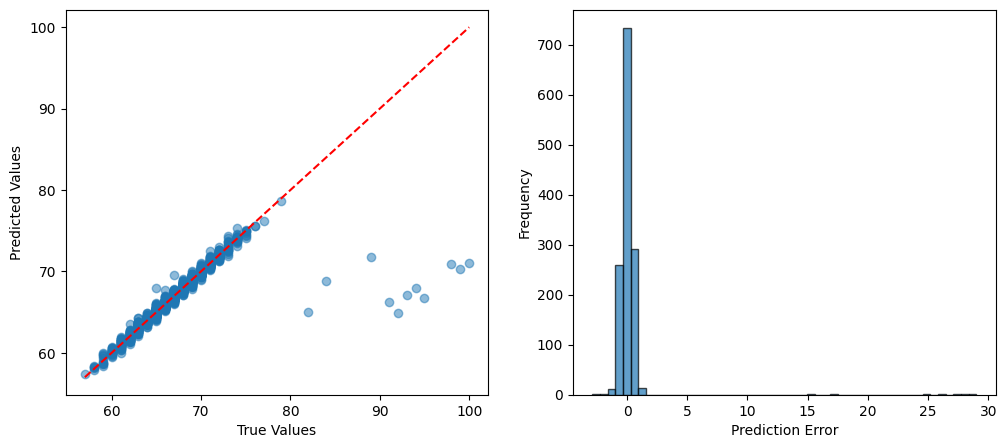

In [8]:
plot_results(y_test, y_pred_svr)

## MLP Graph

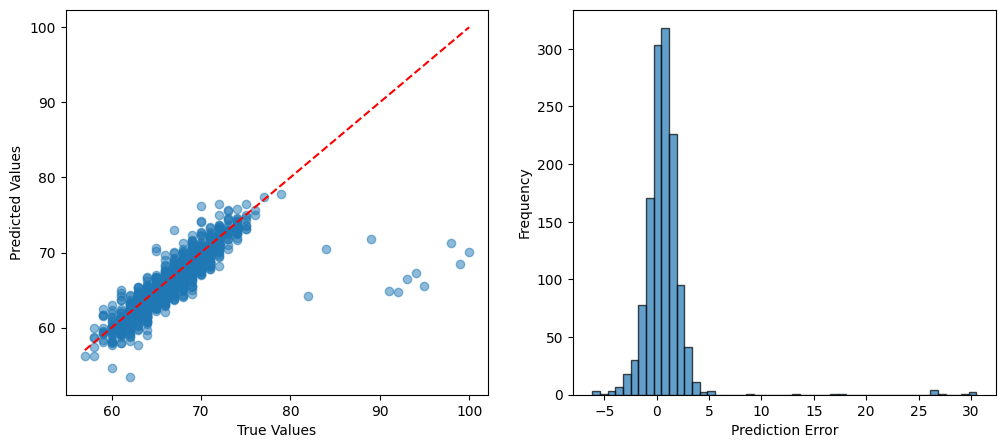

In [9]:
plot_results(y_test, y_pred_mlp)